# Market Sale Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [3]:
file_location="C:\\Users\\Work Only\\Downloads\\train_v9rqX0R.csv"
sale=pd.read_csv(file_location)
sale


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Missing Value Analysis

In [4]:
sale.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
iw_median=sale['Item_Weight'].median()
sale['Item_Weight'].fillna(iw_median,inplace=True)

os_mode=sale['Outlet_Size'].mode().iloc[0]
sale['Outlet_Size'].fillna(os_mode,inplace=True)

In [6]:
sale.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [7]:
sale

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [11]:
sale.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [8]:
sale.select_dtypes(include='object').nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [9]:
sale.drop('Item_Identifier',axis=1,inplace=True)

In [12]:
sale

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# EDA

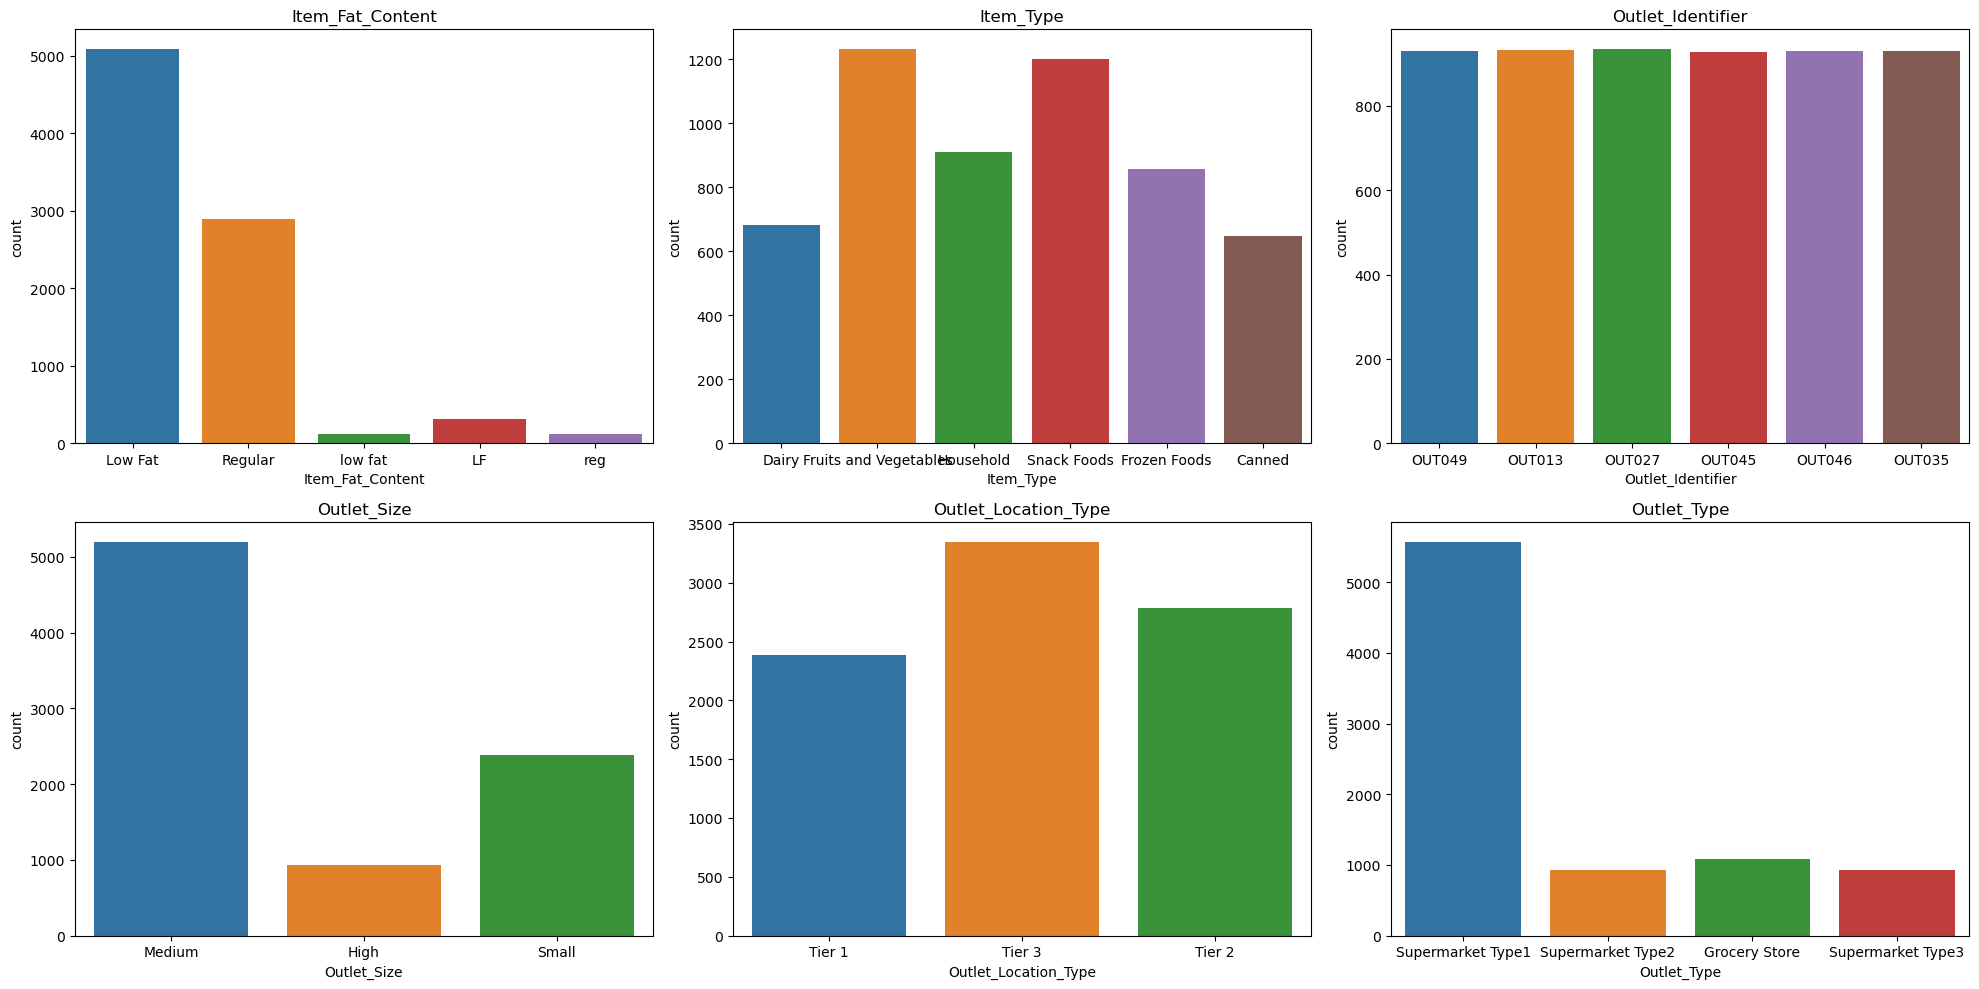

In [20]:
cat_col=sale.select_dtypes(include='object').columns.to_list()

num_cols=len(cat_col)
num_rows=(num_cols + 2)//3
fig,ax=plt.subplots(ncols=3,nrows=num_rows,figsize=(20,5*num_rows))
ax=ax.flatten()

for i,column in enumerate(cat_col):
    top=sale[column].value_counts().nlargest(6).index
    filtered=sale[sale[column].isin(top)]
    sns.countplot(data=filtered,x=column,ax=ax[i])
    ax[i].set_title(column)
    
if num_cols<len(ax):
    for i in range(num_cols,len(ax)):
        fig.delaxes(ax[i])
        
fig.tight_layout()

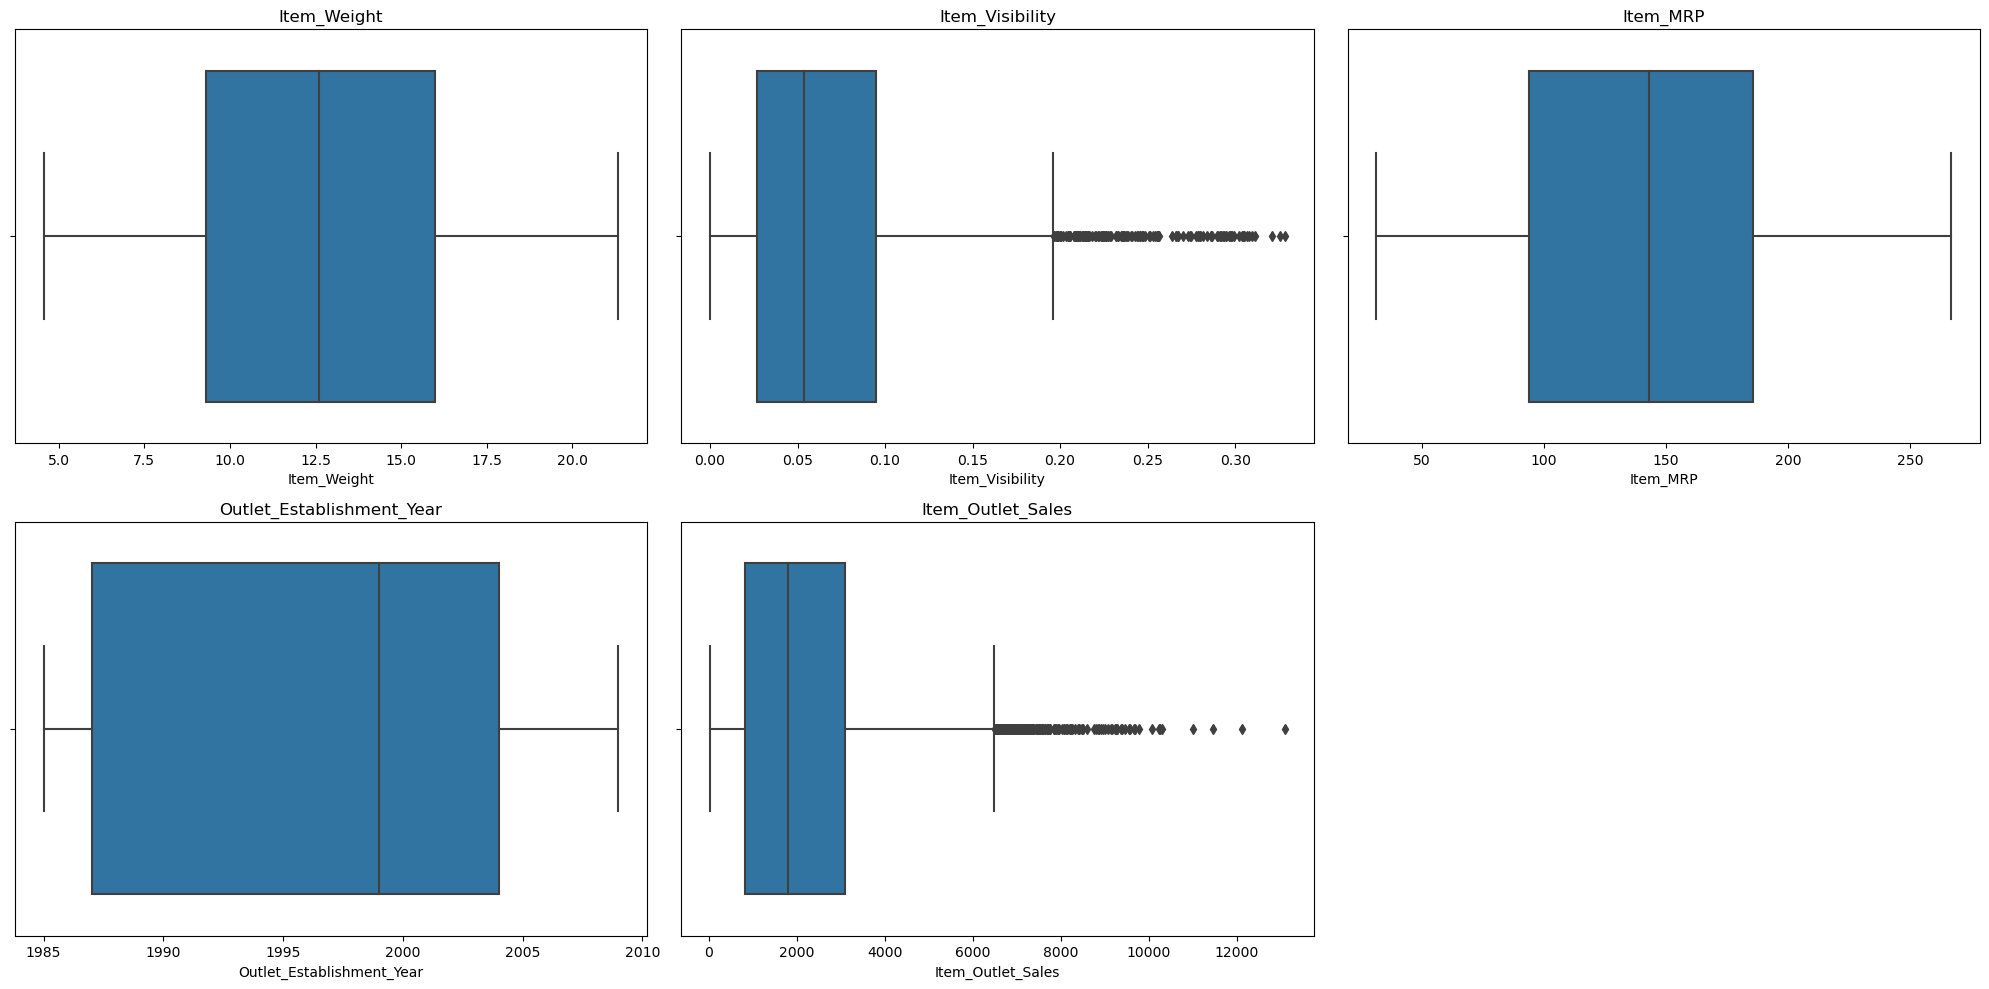

In [12]:
numerical_col=sale.select_dtypes(include=['int','float']).columns.to_list()

num_cols=len(numerical_col)
num_rows=(num_cols + 2)//3
fig,ax=plt.subplots(ncols=3,nrows=num_rows,figsize=(20,5*num_rows))
ax=ax.flatten()

for i,column in enumerate(numerical_col):
    sns.boxplot(data=sale,x=column,ax=ax[i])
    ax[i].set_title(column)
    
if num_cols<len(ax):
    for i in range(num_cols,len(ax)):
        fig.delaxes(ax[i])
        
fig.tight_layout()

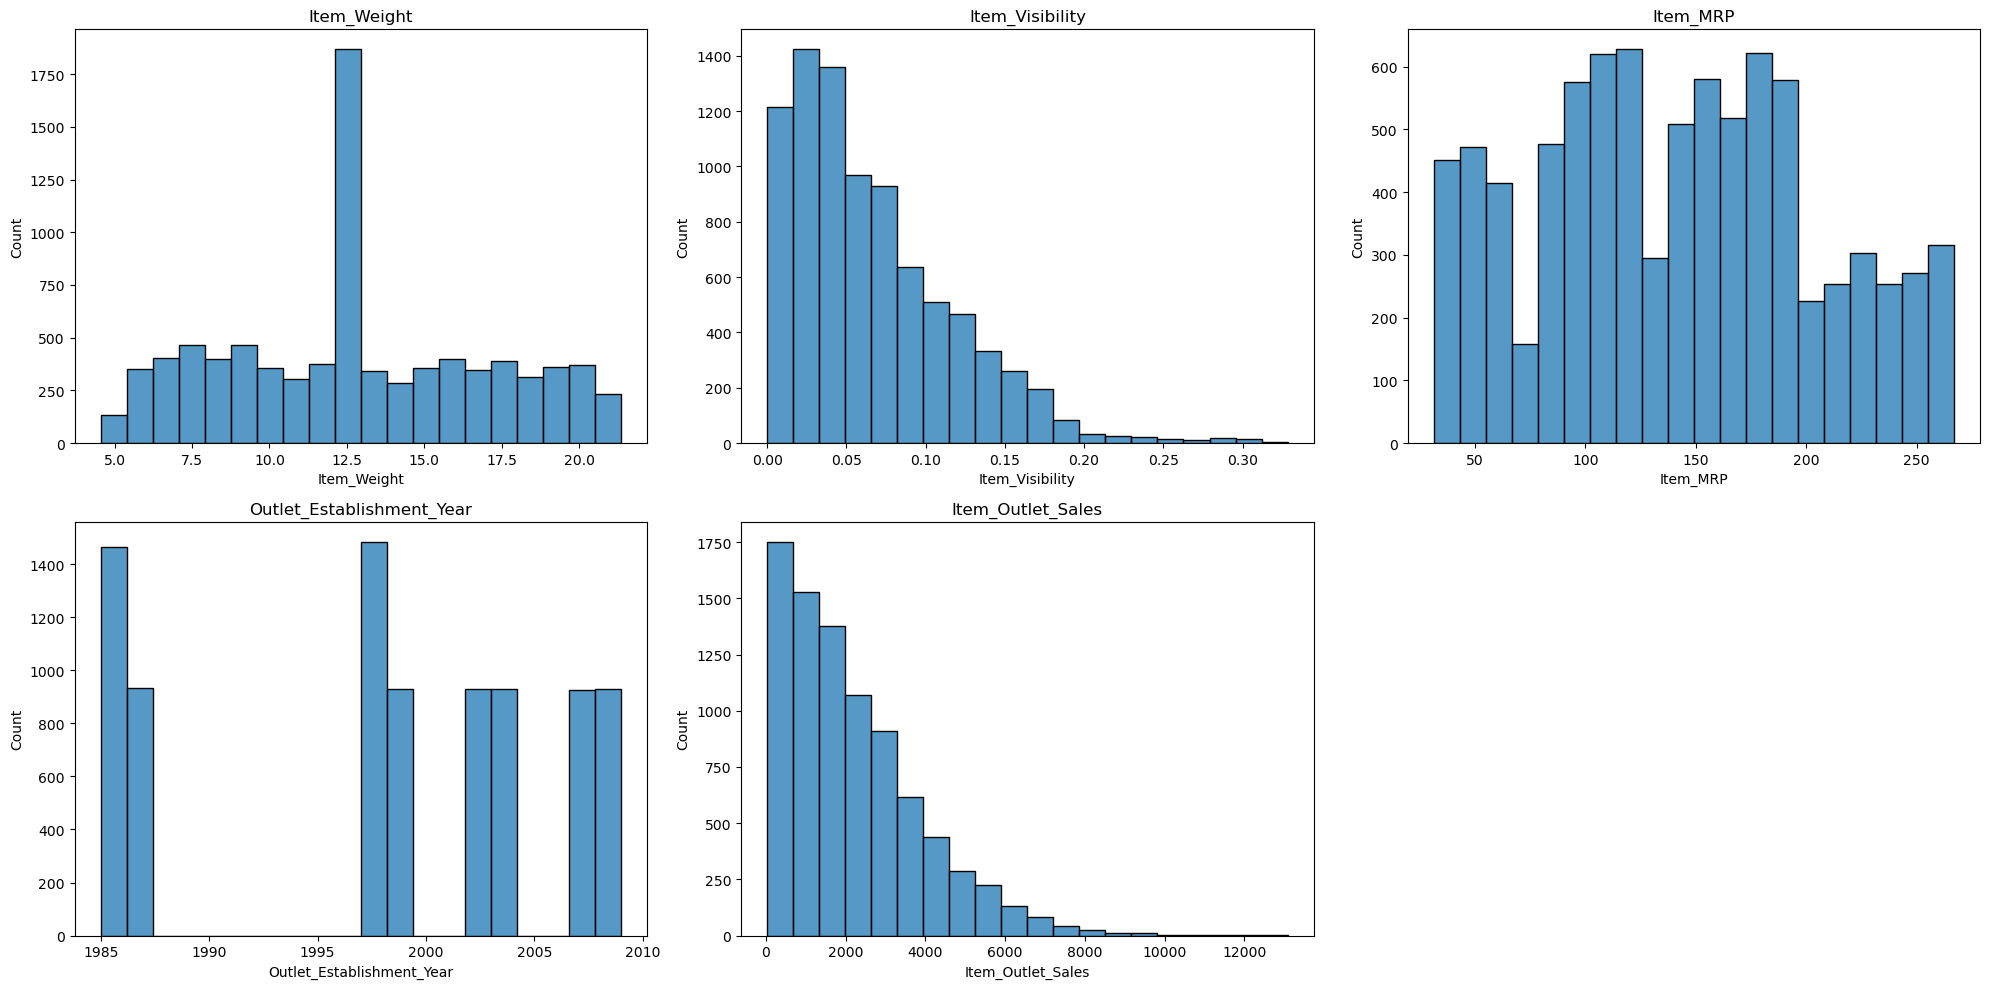

In [14]:
numerical_col=sale.select_dtypes(include=['int','float']).columns.to_list()

num_cols=len(numerical_col)
num_rows=(num_cols + 2)//3
fig,ax=plt.subplots(ncols=3,nrows=num_rows,figsize=(20,5*num_rows))
ax=ax.flatten()

for i,column in enumerate(numerical_col):
    sns.histplot(data=sale,x=column,ax=ax[i],bins=20)
    ax[i].set_title(column)
    
if num_cols<len(ax):
    for i in range(num_cols,len(ax)):
        fig.delaxes(ax[i])
        
fig.tight_layout()

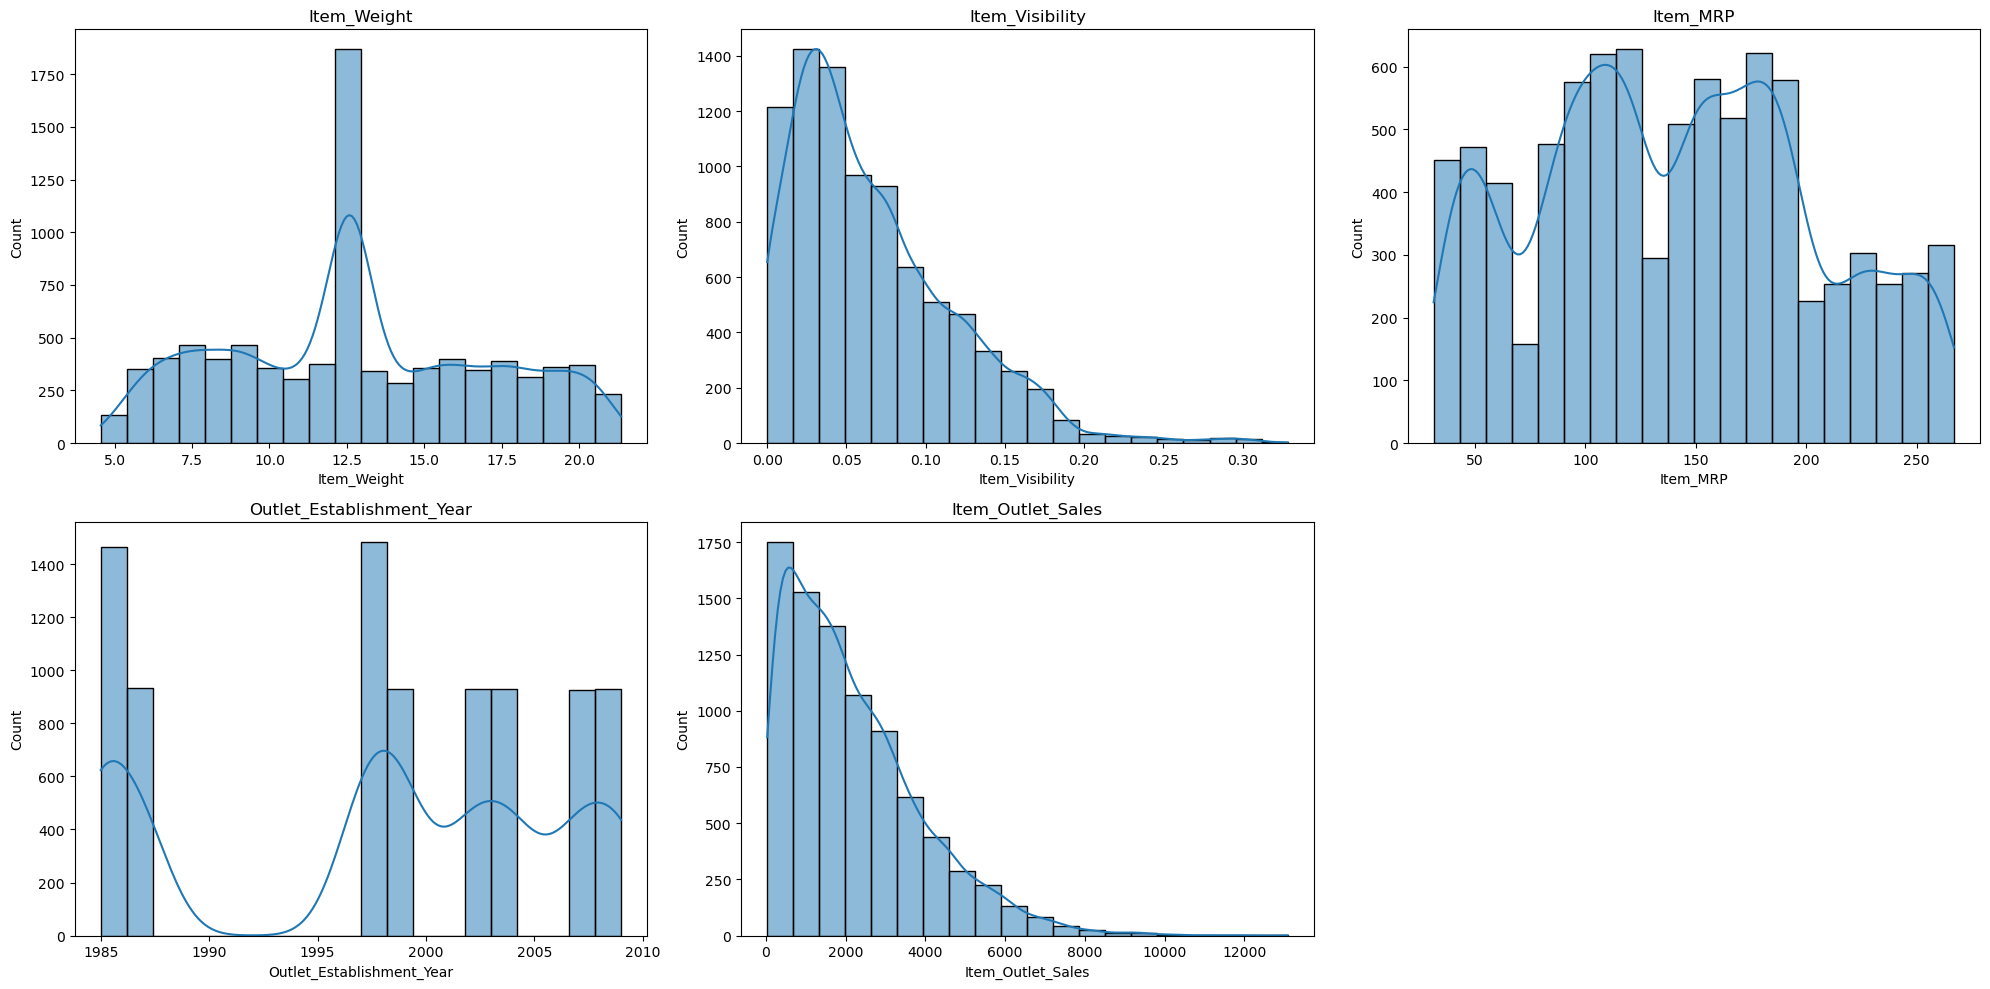

In [15]:
numerical_col=sale.select_dtypes(include=['int','float']).columns.to_list()

num_cols=len(numerical_col)
num_rows=(num_cols + 2)//3
fig,ax=plt.subplots(ncols=3,nrows=num_rows,figsize=(20,5*num_rows))
ax=ax.flatten()

for i,column in enumerate(numerical_col):
    sns.histplot(data=sale,x=column,ax=ax[i],bins=20,kde=True)
    ax[i].set_title(column)
    
if num_cols<len(ax):
    for i in range(num_cols,len(ax)):
        fig.delaxes(ax[i])
        
fig.tight_layout()

C:\Users\Work Only\AppData\Local\Temp\ipykernel_5416\562554847.py:16: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_counts = cat_counts_top.append(cat_counts_other)
C:\Users\Work Only\AppData\Local\Temp\ipykernel_5416\562554847.py:16: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_counts = cat_counts_top.append(cat_counts_other)


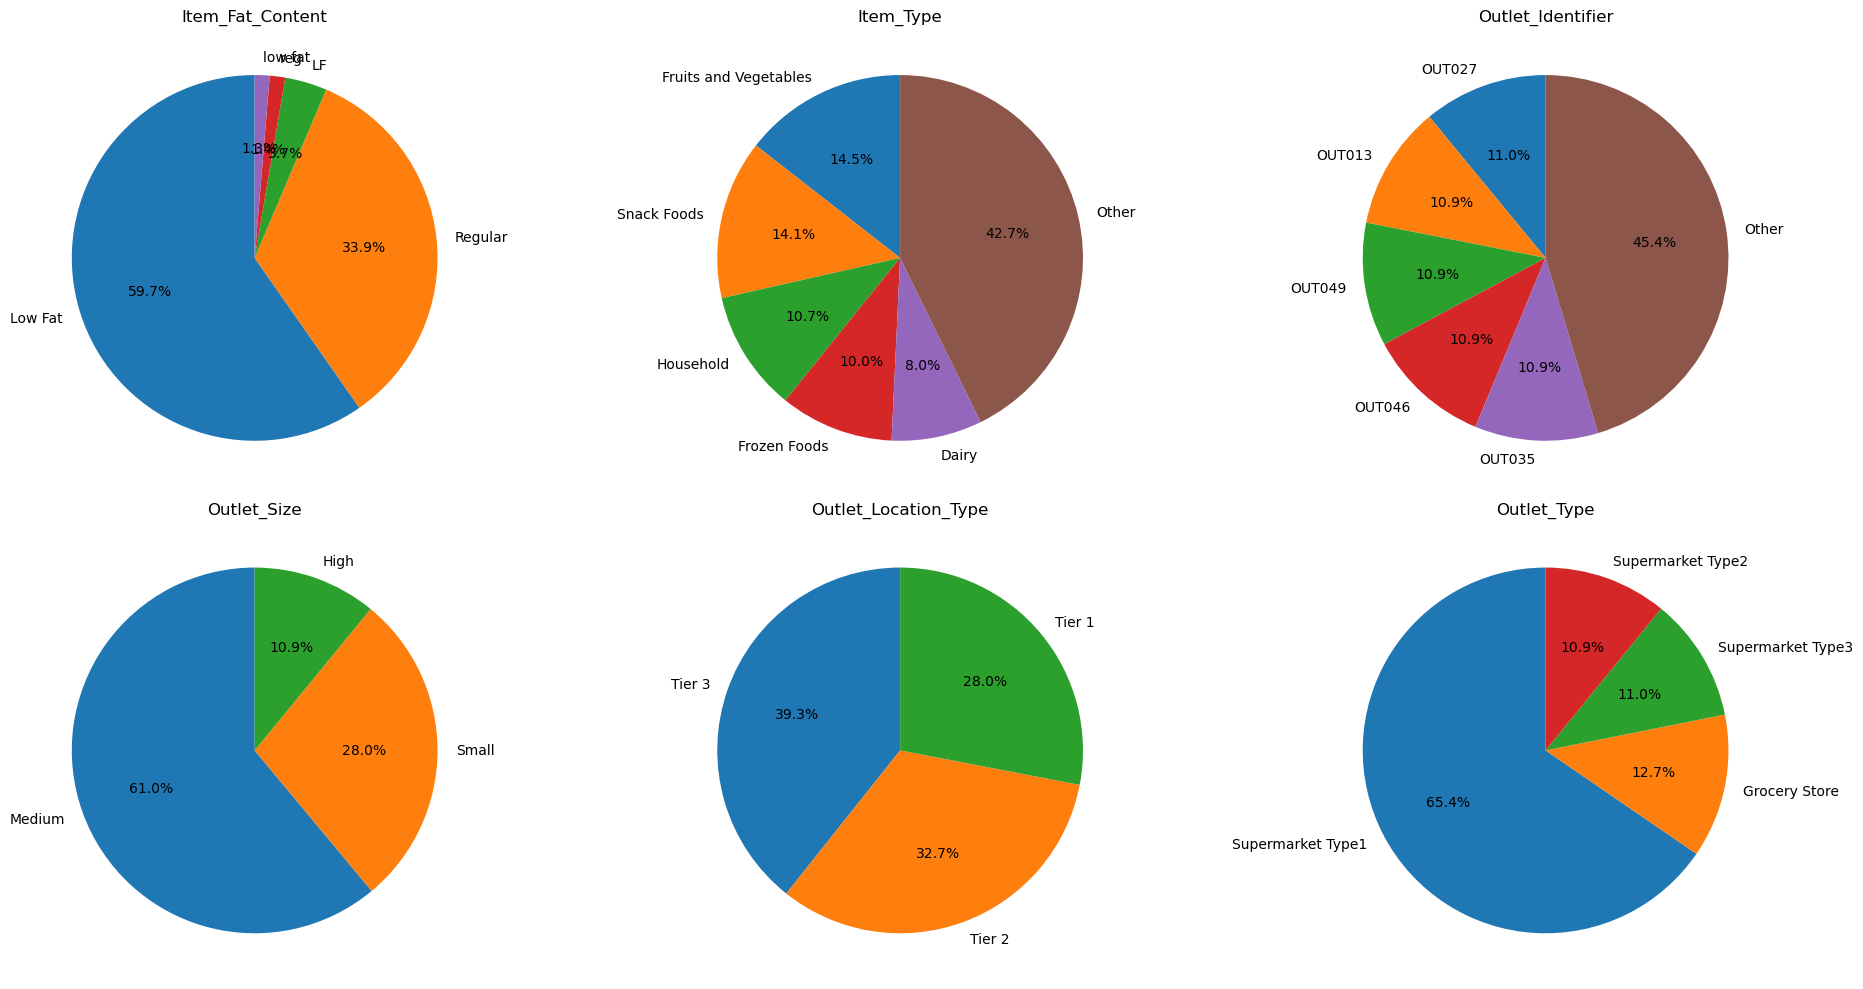

In [18]:
max=5
cat_cols=sale.select_dtypes(include='object').columns.to_list()

num_cols=len(cat_cols)
num_rows=(num_cols + 2)//3
fig,ax=plt.subplots(ncols=3,nrows=num_rows,figsize=(20,5*num_rows))
ax=ax.flatten()

for i,column in enumerate(cat_cols):
    if i<len(ax):
        cat_counts=sale[column].value_counts()
        
        if len(cat_counts)>max:
            cat_counts_top = cat_counts[:max]
            cat_counts_other = pd.Series(cat_counts[max:].sum(), index=['Other'])
            cat_counts = cat_counts_top.append(cat_counts_other)
            
        ax[i].pie(cat_counts,labels=cat_counts.index,autopct="%0.1f%%",startangle=90)
        ax[i].set_title(column)
        

        
        
if num_cols<len(ax):
    for i in range(num_cols,len(ax)):
        fig.delaxes(ax[i])
        
fig.tight_layout()

In [10]:
sale

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [11]:
for column in sale.select_dtypes(include='object').columns:
    print("{} :   {}".format(column,sale[column].unique()))

Item_Fat_Content :   ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type :   ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier :   ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size :   ['Medium' 'High' 'Small']
Outlet_Location_Type :   ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type :   ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


# Label Encoder

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in sale.select_dtypes(include='object').columns:
    sale[column]=le.fit_transform(sale[column])
    
    print("{}  :  {}".format(column,sale[column].unique()))

Item_Fat_Content  :  [1 2 3 0 4]
Item_Type  :  [ 4 14 10  6  9  0 13  5  2  8  7  3  1 15 11 12]
Outlet_Identifier  :  [9 3 0 1 5 7 2 8 6 4]
Outlet_Size  :  [1 0 2]
Outlet_Location_Type  :  [0 2 1]
Outlet_Type  :  [1 2 0 3]


In [15]:
sale

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [16]:
sale.corr()['Item_Outlet_Sales']

Item_Weight                  0.009693
Item_Fat_Content             0.009800
Item_Visibility             -0.128625
Item_Type                    0.017048
Item_MRP                     0.567574
Outlet_Identifier            0.162325
Outlet_Establishment_Year   -0.049135
Outlet_Size                 -0.086182
Outlet_Location_Type         0.089367
Outlet_Type                  0.401522
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

# Model Development with Linear Regression

In [17]:
X=sale.drop('Item_Outlet_Sales',axis=1)
y=sale[['Item_Outlet_Sales']]

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.30)

In [19]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [20]:
y_predictions=LR.predict(X_test)

In [24]:
y_predictions

array([[2477.00917812],
       [2489.38091042],
       [1815.85918021],
       ...,
       [2321.99685227],
       [2134.28263101],
       [2382.32460975]])

In [22]:
y_test

,Item_Outlet_Sales
4931,1426.1436
4148,1201.7690
7423,1836.2764
4836,2410.8618
944,1549.9824
...,...
5460,2996.1000
7384,2173.1712
1336,1981.4208
8455,4206.5244


In [26]:
from sklearn.metrics import r2_score
R2=r2_score(y_test,y_predictions)
print("R-square value is : ",R2)


R-square value is :  0.5090080239928624


# Saving the model using Pickle

In [21]:
import pickle
pickle.dump(LR,open('mart_sale_prediction.pkl','wb'))

In [22]:
model=pickle.load(open('mart_sale_prediction.pkl','rb'))
model

LinearRegression()